In [1]:
import pandas as pd
df = pd.read_csv('/content/cleaned_songs_data_sentiment.csv')
df.head()

,ID,Tracks,Album_ID,Album,Album_Path,Lyrics,Sentiment
0,6688213,Mine (Taylors Version),758025,Speak Now (Taylor’s Version),/content/albums/data/Albums/SpeakNow_Taylor_sV...,"\nAh-ah, ah-ah\nAh-ah, ah-ah\n\n\nYou were in ...",Positive
1,6688225,Sparks Fly (Taylors Version),758025,Speak Now (Taylor’s Version),/content/albums/data/Albums/SpeakNow_Taylor_sV...,\nThe way you move is like a full on rainstorm...,Positive
2,6688226,Back To December (Taylors Version),758025,Speak Now (Taylor’s Version),/content/albums/data/Albums/SpeakNow_Taylor_sV...,\nI'm so glad you made time to see me\nHow's l...,Negative
3,6688227,Speak Now (Taylors Version),758025,Speak Now (Taylor’s Version),/content/albums/data/Albums/SpeakNow_Taylor_sV...,\nI am not the kind of girl\nWho should be rud...,Positive
4,6688228,Dear John (Taylors Version),758025,Speak Now (Taylor’s Version),/content/albums/data/Albums/SpeakNow_Taylor_sV...,\nLong were the nights\nWhen my days once revo...,Negative


In [2]:
df = df.drop(columns=['ID', 'Album_ID', 'Album_Path'])
df.head()

,Tracks,Album,Lyrics,Sentiment
0,Mine (Taylors Version),Speak Now (Taylor’s Version),"\nAh-ah, ah-ah\nAh-ah, ah-ah\n\n\nYou were in ...",Positive
1,Sparks Fly (Taylors Version),Speak Now (Taylor’s Version),\nThe way you move is like a full on rainstorm...,Positive
2,Back To December (Taylors Version),Speak Now (Taylor’s Version),\nI'm so glad you made time to see me\nHow's l...,Negative
3,Speak Now (Taylors Version),Speak Now (Taylor’s Version),\nI am not the kind of girl\nWho should be rud...,Positive
4,Dear John (Taylors Version),Speak Now (Taylor’s Version),\nLong were the nights\nWhen my days once revo...,Negative


In [3]:
df['Lyrics'] = df['Lyrics'].str.lower().str.strip()
df['Lyrics'] = df['Lyrics'].str.encode('ascii', 'ignore').str.decode('utf-8')
df['Sentiment'] = df['Sentiment'].str.lower().str.strip()
df.head()

,Tracks,Album,Lyrics,Sentiment
0,Mine (Taylors Version),Speak Now (Taylor’s Version),"ah-ah, ah-ah\nah-ah, ah-ah\n\n\nyou were in co...",positive
1,Sparks Fly (Taylors Version),Speak Now (Taylor’s Version),the way you move is like a full on rainstorm\n...,positive
2,Back To December (Taylors Version),Speak Now (Taylor’s Version),i'm so glad you made time to see me\nhow's lif...,negative
3,Speak Now (Taylors Version),Speak Now (Taylor’s Version),i am not the kind of girl\nwho should be rudel...,positive
4,Dear John (Taylors Version),Speak Now (Taylor’s Version),long were the nights\nwhen my days once revolv...,negative


In [4]:
sentiment_map = {'positive': 1, 'negative': 0, 'neutral': 2}
df['Sentiment_Label'] = df['Sentiment'].map(sentiment_map)
df.head()

,Tracks,Album,Lyrics,Sentiment,Sentiment_Label
0,Mine (Taylors Version),Speak Now (Taylor’s Version),"ah-ah, ah-ah\nah-ah, ah-ah\n\n\nyou were in co...",positive,1
1,Sparks Fly (Taylors Version),Speak Now (Taylor’s Version),the way you move is like a full on rainstorm\n...,positive,1
2,Back To December (Taylors Version),Speak Now (Taylor’s Version),i'm so glad you made time to see me\nhow's lif...,negative,0
3,Speak Now (Taylors Version),Speak Now (Taylor’s Version),i am not the kind of girl\nwho should be rudel...,positive,1
4,Dear John (Taylors Version),Speak Now (Taylor’s Version),long were the nights\nwhen my days once revolv...,negative,0


In [5]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
df.dtypes

,0
Tracks,object
Album,object
Lyrics,object
Sentiment,object
Sentiment_Label,int64


In [7]:
df[df['Lyrics'].isna()]

,Tracks,Album,Lyrics,Sentiment,Sentiment_Label


In [8]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)
df['Lyrics'] = df['Lyrics'].apply(preprocess_text)
df.head()

,Tracks,Album,Lyrics,Sentiment,Sentiment_Label
0,Mine (Taylors Version),Speak Now (Taylor’s Version),ahah ahah ahah ahah college working parttime w...,positive,1
1,Sparks Fly (Taylors Version),Speak Now (Taylor’s Version),way move like full rainstorm im house card you...,positive,1
2,Back To December (Taylors Version),Speak Now (Taylor’s Version),im glad made time see hows life tell hows fami...,negative,0
3,Speak Now (Taylors Version),Speak Now (Taylor’s Version),kind girl rudely bargin white veil occasion ki...,positive,1
4,Dear John (Taylors Version),Speak Now (Taylor’s Version),long night day revolved around counting footst...,negative,0


<ipython-input-9-e58871550cba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_names, y=sentiment_counts.values, palette='coolwarm')


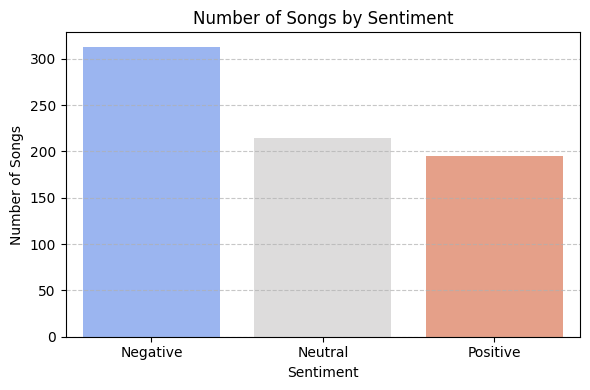

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sentiment_counts = df['Sentiment_Label'].value_counts().sort_index()
sentiment_names = ['Negative', 'Positive'] if sentiment_counts.index.max() == 1 else ['Negative', 'Neutral', 'Positive']
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_names, y=sentiment_counts.values, palette='coolwarm')
plt.title('Number of Songs by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Songs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
df.to_csv('TaylorSwift_Cleaned.csv', index=False)

In [11]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [13]:
def get_vader_sentiment(text):
    score = vader_analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 1
    elif score <= -0.05:
        return 0
    else:
        return 2

In [14]:
from transformers import pipeline
distilbert_classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [15]:
def get_distilbert_sentiment(text):
    try:
        result = distilbert_classifier(text[:512])[0]
        return 1 if result['label'] == 'POSITIVE' else 0
    except:
        return -1


In [16]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Sentiment_Label'])
test_df['VADER_Label'] = test_df['Lyrics'].apply(get_vader_sentiment)
filtered_test_df = test_df[test_df['Sentiment_Label'].isin([0, 1])].copy()
filtered_test_df['DistilBERT_Label'] = filtered_test_df['Lyrics'].apply(get_distilbert_sentiment)
filtered_test_df = filtered_test_df[filtered_test_df['DistilBERT_Label'] != -1]
filtered_test_df.head()

,Tracks,Album,Lyrics,Sentiment,Sentiment_Label,VADER_Label,DistilBERT_Label
138,The Great War,Midnights (3am Edition),knuckle bruised like violet sucker punching wa...,negative,0,1,0
7,Enchanted (Taylors Version),Speak Now (Taylor’s Version),tonight forcing laughter faking smile old tire...,positive,1,1,1
371,Style,1989,midnight come pick headlight long drive could ...,positive,1,1,0
64,22 (Taylors Version),The More Red (Taylor’s Version) Chapter,feel like perfect night dress like hipster mak...,positive,1,1,0
644,Blank Space (Taylors Version),1989 (Taylor’s Version),nice meet could show incredible thing magic ma...,negative,0,0,0


In [17]:
from sklearn.metrics import accuracy_score
vader_accuracy = accuracy_score(test_df['Sentiment_Label'], test_df['VADER_Label'])
print(f"VADER Accuracy: {vader_accuracy:.2f}")
distilbert_accuracy = accuracy_score(filtered_test_df['Sentiment_Label'], filtered_test_df['DistilBERT_Label'])
print(f"DistilBERT Accuracy (binary only): {distilbert_accuracy:.2f}")

VADER Accuracy: 0.41
DistilBERT Accuracy (binary only): 0.62


In [18]:
def get_hybrid_sentiment(text):
    vader_label = get_vader_sentiment(text)
    distilbert_label = get_distilbert_sentiment(text)

    if vader_label == distilbert_label:
        return vader_label
    elif vader_label == 2:
        return distilbert_label
    elif distilbert_label == -1:
        return vader_label
    else:
        return distilbert_label

In [19]:
filtered_test_df['Hybrid_Label'] = filtered_test_df['Lyrics'].apply(get_hybrid_sentiment)
hybrid_accuracy = accuracy_score(filtered_test_df['Sentiment_Label'], filtered_test_df['Hybrid_Label'])
print(f"Hybrid Accuracy (binary only): {hybrid_accuracy:.2f}")

Hybrid Accuracy (binary only): 0.62


# Use hybrid sentiment to find songs with similar mood
def recommend_songs(user_input, df, top_n=5):
    processed_input = preprocess_text(user_input)
    user_sentiment = get_hybrid_sentiment(processed_input)

    if user_sentiment not in [0, 1, 2]:
        print("Could not determine sentiment.")
        return df.sample(top_n)[['Title', 'Artist']]

    recommendations = df[df['Sentiment_Label'] == user_sentiment]

    if len(recommendations) == 0:
        print("No matching sentiment songs found. Showing random picks.")
        return df.sample(top_n)[['Title', 'Artist']]

    return recommendations[['Title', 'Artist']].sample(min(top_n, len(recommendations)))

user_input = input("How are you feeling or describe your mood:\n>>> ")
recommended = recommend_songs(user_input, df)
print("\n🎵 Recommended Songs Based on Your Mood:\n")
print(recommended.to_string(index=False))

In [20]:
pip install transformers

In [21]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Use the Hugging Face GoEmotions model (27-class + neutral)
model_id = "SamLowe/roberta-base-go_emotions"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSequenceClassification.from_pretrained(model_id)
goemotion_classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [22]:
# These are the labels used by SamLowe's model
emotion_labels = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
    'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment',
    'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism',
    'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'
]

In [23]:
def get_emotion_label(text):
    scores = goemotion_classifier(text[:512])[0]
    top_emotion = max(scores, key=lambda x: x['score'])
    return top_emotion['label']

In [24]:
df['Emotion_Label'] = df['Lyrics'].apply(get_emotion_label)
df.head()

,Tracks,Album,Lyrics,Sentiment,Sentiment_Label,Emotion_Label
0,Mine (Taylors Version),Speak Now (Taylor’s Version),ahah ahah ahah ahah college working parttime w...,positive,1,amusement
1,Sparks Fly (Taylors Version),Speak Now (Taylor’s Version),way move like full rainstorm im house card you...,positive,1,neutral
2,Back To December (Taylors Version),Speak Now (Taylor’s Version),im glad made time see hows life tell hows fami...,negative,0,joy
3,Speak Now (Taylors Version),Speak Now (Taylor’s Version),kind girl rudely bargin white veil occasion ki...,positive,1,neutral
4,Dear John (Taylors Version),Speak Now (Taylor’s Version),long night day revolved around counting footst...,negative,0,remorse


In [25]:
def recommend_songs_emotion(df, top_n=5):
    user_input = input("Describe your current emotion or how you're feeling:\n>>> ").strip()
    processed_input = preprocess_text(user_input)
    emotion = get_emotion_label(processed_input)

    print(f"\nDetected Emotion: {emotion.capitalize()}")

    matches = df[df['Emotion_Label'] == emotion]
    if matches.empty:
        print("No songs match this emotion. Showing random picks.")
        return df.sample(top_n)[['Tracks', 'Emotion_Label']]

    return matches[['Tracks', 'Emotion_Label']].sample(min(top_n, len(matches)))


In [26]:
recommended_emotion = recommend_songs_emotion(df)
print("\n Recommended Songs Based on Emotion:\n")
print(recommended_emotion.to_string(index=False))

Describe your current emotion or how you're feeling:
>>> happy

Detected Emotion: Joy

 Recommended Songs Based on Emotion:

                             Tracks Emotion_Label
              ME! (Live from Paris)           joy
              ME! (Live from Paris)           joy
 Back To December (Taylors Version)           joy
The Moment I Knew (Taylors Version)           joy
The Moment I Knew (Taylors Version)           joy


In [28]:
print(df.columns)


Index(['Tracks', 'Album', 'Lyrics', 'Sentiment', 'Sentiment_Label',
       'Emotion_Label'],
      dtype='object')


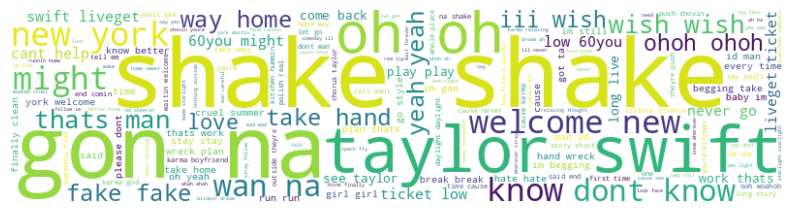

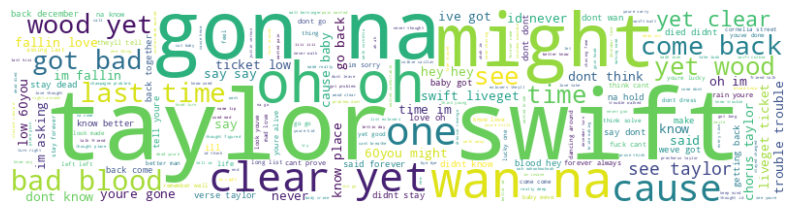

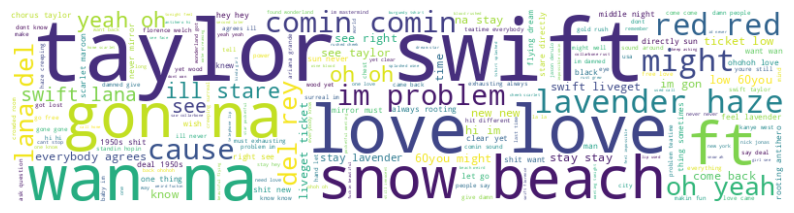

In [36]:
from wordcloud import WordCloud

for sentiment in df['Sentiment_Label'].unique():
    text = " ".join(df[df['Sentiment_Label'] == sentiment]['Lyrics'])
    wc = WordCloud(width=800, height=200, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [41]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch

# Load pretrained DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

# Tokenize lyrics (use a small sample if testing)
texts = df['Lyrics'].tolist()[:100]  # Use [:100] for speed; remove for full dataset
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

# Get embeddings
with torch.no_grad():
    outputs = model(**inputs)

# Take mean of last hidden state as sentence embedding
bert_embeddings = outputs.last_hidden_state.mean(dim=1).numpy()


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

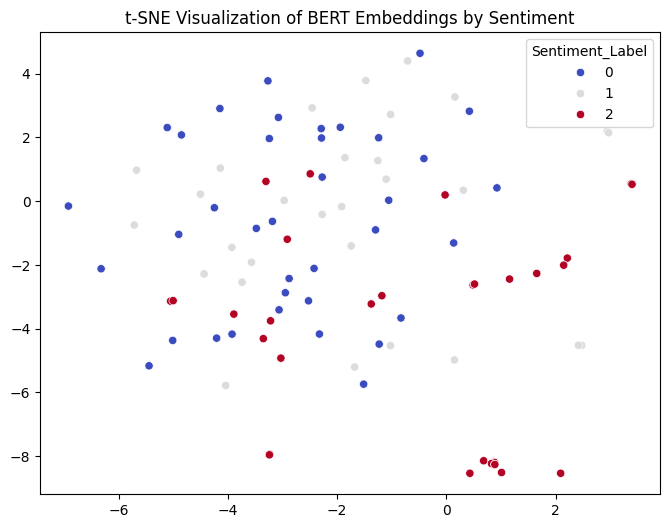

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(bert_embeddings)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=df['Sentiment_Label'][:len(tsne_results)], palette='coolwarm')
plt.title('t-SNE Visualization of BERT Embeddings by Sentiment')
plt.show()
